<a href="https://colab.research.google.com/github/leandroleao2k/PyLeao/blob/main/PreProc_WebScrapping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Web Scrapping 
Extrair dados de Manaus do site Imapi.org 

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import re
import time
from datetime import datetime
# capturar paginas 
import requests 
from urllib.request import urlopen
from bs4 import BeautifulSoup


# Carreganto a pagina
Cabeçalho do seu browser para a request ao site imapi.org
https://www.whatismybrowser.com/detect/what-http-headers-is-my-browser-sending

Depois estudar a estrutura da pagina e capturar os atributos com o Soup
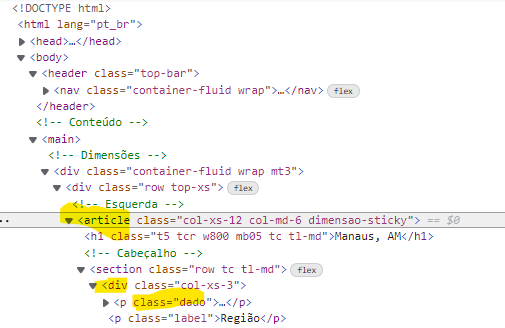

In [62]:
headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/97.0.4692.99 Safari/537.36 Edg/97.0.1072.76", 
    "Accept-Encoding" :  "gzip, deflate, br",  
    "Accept" :  "text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9", 
    "DNT" :  "1", 
    "Connection" :  "close",  
    "Upgrade-Insecure-Requests" : "1"}

req = requests.get('https://imapi.org/perfil/manaus-am' , headers=headers)
soup = BeautifulSoup(req.content, 'html.parser')

# exemplo  price = soup.find(id="priceblock_ourprice").get_text()

# achar todos article 
for d in soup.findAll('article'):  #attrs={'class':'dimensao-sticky'}
  for j in d.findAll('div', attrs={'class':'col-x3-3'}):
    label = j.find('p',attrs={'class':'label'})
    dado = j.find('p',attrs={'class':'dado'})
    print("Label ", label.text, " dado ", dado.text)

dimensoes = []
labels = []
valores = []
for i in soup.findAll('section', attrs={'class':'card'}):
  print('---')
  for d in i.findAll('article',attrs={'class':'indicador'}):
    label = d.find('p',attrs={'class':'label'})
    dado = d.find('p', attrs={'class':'dado'})
    print("Label ", label.text, "; Dado:", dado.text)
    
    municipio = d.find('div', attrs={'class':'local ativo'})
    if municipio != None and municipio.has_attr('data-nota'):
        print('Valor:', municipio['data-nota'])
    else:
        print('Valor: N/A')    
    dimensoes.append(i['data-dimensao'])
    labels.append(label.text)
    valores.append(municipio['data-nota'])

---
Label  Percentual de gestantes que iniciaram o pré-natal com 12 semanas ou menos ; Dado: Início adequado do pré-natal
Valor: 69,12
Label  Percentual de gestantes com 6 ou mais consultas de pré‐natal  ; Dado: Consultas de pré-natal
Valor: 65,39
Label  Percentual  de gravidez na adolescência ; Dado: Gravidez na adolescência
Valor: 20,07
Label  Percentual de cesáreas ; Dado: Cesáreas
Valor: 46,25
Label  Percentual de crianças nascidas com menos de 37 semanas completas de gestação ; Dado: Prematuridade
Valor: 9,12
Label  Percentual de nascidos vivos com menos de 2500g ; Dado: Baixo peso ao nascer
Valor: 7,98
Label  Casos confirmados e notificados de sífilis congênita para cada 10.000 crianças  menores de 5 anos ; Dado: Sífilis Congênita
Valor: 15,01
Label  Percentual de equipes da atenção básica que participaram do PMAQ 2º ciclo e fizeram visitas domiciliares nos primeiros 10 dias de vida  ; Dado: Visitas domiciliares nos primeiros 10 dias de vida
Valor: 93,42
Label  Percentual de cria

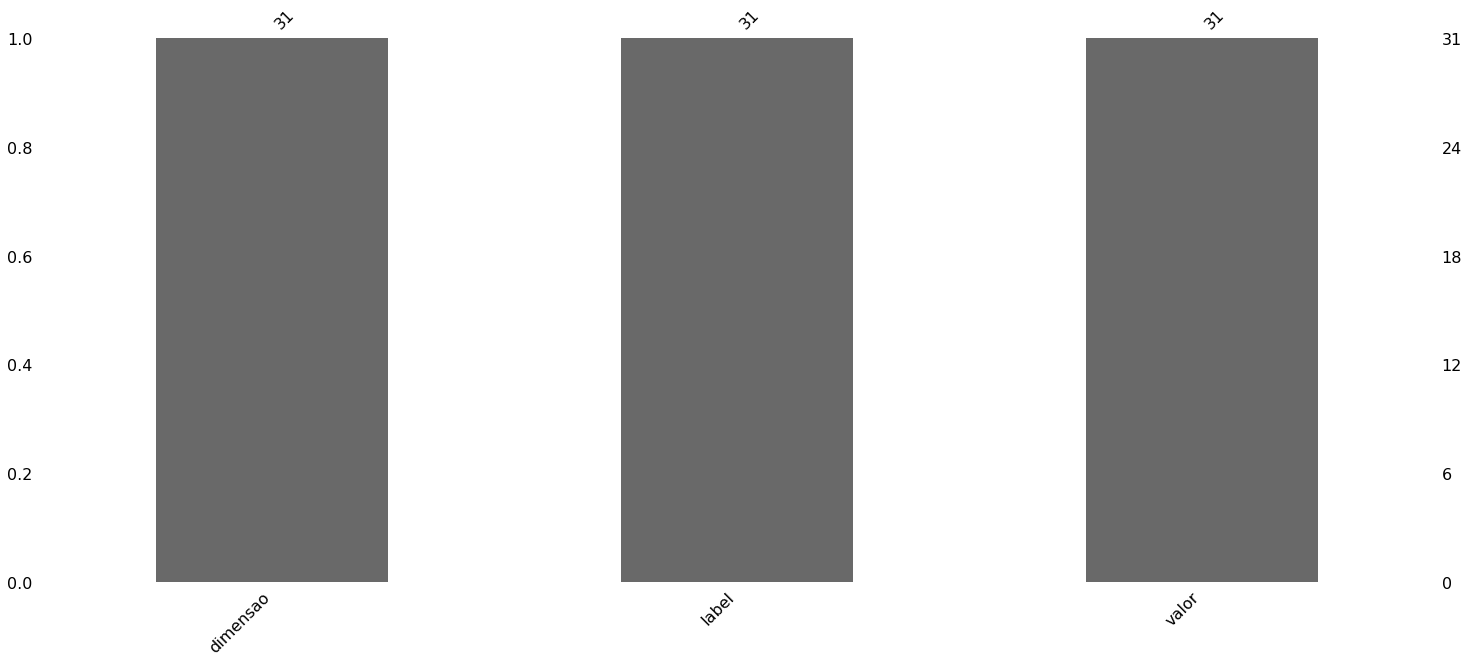

In [69]:
res = {'dimensao' : dimensoes, 'label': labels, 'valor': valores}
res_manaus = pd.DataFrame().from_dict(res)
import missingno as msno
msno.bar(res_manaus)

# Disparar o javascript para pegar as cidades com Selenium
## !pip install selenium



In [3]:
# !pip install selenium
from selenium import webdriver
from bs4 import BeautifulSoup

chrome = webdriver.ChromeOptions()
chrome.add_argument('--headless')
chrome.add_argument('--no-sandbox')
chrome.add_argument('disable-dev-shm-usage')
driver = webdriver.Chrome('chromedriver', options=chrome)
driver.get(url)
html = driver.page_source
soup2 = BeautifulSoup(html, 'html.parser')


WebDriverException: ignored